In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import re

from tqdm.notebook import tqdm
import IPython.display as ipd

import os
import sys
import time

from bs4 import BeautifulSoup
import requests
!pip install requests_html -q
from requests_html import HTMLSession

!pip install mysql-connector-python -q
import mysql.connector

# install HuggingFace Sentiment-Analysis Transformer model
!pip install transformers -q
from transformers import pipeline
sentiment_pipeline = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

# install HuggingFace Sentiment-Analysis Transformer model particularly trained on Crypto
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
model_name = "ElKulako/cryptobert"
# tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
# model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = 3)
# sentiment_pipeline_crypto = TextClassificationPipeline(model=model, tokenizer=tokenizer, max_length=64, truncation=True, padding = 'max_length')
sentiment_pipeline_crypto = pipeline('sentiment-analysis', model="ElKulako/cryptobert")

# install chromium browser and chrome driver
!apt-get update -q
!apt-get install -y chromium-browser -q
!apt install chromium-chromedriver -q
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver') # Add chromedriver to Environment path

# install selenium
!pip install selenium -q
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

ipd.clear_output(wait=True)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 22.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,283 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,260 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports/main amd64 Packages [50.4 kB]
Get:13 http://archive.ubuntu.com/ub

In [ ]:
coins = ["Aave", "Bitcoin", "Cardano", "Chainlink", "Dogecoin", "EOS", "Ethereum", "Litecoin", "Polkadot", "Stellar", "Tether", "Uniswap", "USDC", "XRP"]

# Downloading the model locally (just for later usage)

In [ ]:
# install HuggingFace Sentiment-Analysis Transformer model
!pip install transformers -q
from transformers import pipeline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.1 MB/s eta 0:00:00


In [ ]:
sentiment_pipeline_crypto = pipeline('sentiment-analysis', model="ElKulako/cryptobert")

In [ ]:
sentiment_pipeline_crypto("You are great!")

[{'label': 'Bullish', 'score': 0.6149212718009949}]

In [ ]:
sentiment_pipeline_crypto.save_pretrained('/content/cryptobert') # saving inside content folder

In [ ]:
# Loading the model
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('/content/cryptobert', use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained('/content/cryptobert', num_labels = 3)
a = TextClassificationPipeline(model=model, tokenizer=tokenizer, max_length=64, truncation=True, padding = 'max_length')

In [ ]:
a("You are great!")

[{'label': 'Bullish', 'score': 0.6149212121963501}]

In [ ]:
sentiment_pipeline = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english") # load model

In [ ]:
sentiment_pipeline("You are great!")

[{'label': 'POSITIVE', 'score': 0.9998674392700195}]

In [ ]:
sentiment_pipeline.save_pretrained('/content/distillbert') # saving inside content folder

In [ ]:
# Load downloaded model
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('/content/distillbert', use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained('/content/distillbert', num_labels = 2)
b = TextClassificationPipeline(model=model, tokenizer=tokenizer, max_length=64, truncation=True, padding = 'max_length')

In [ ]:
b("You are great!")

[{'label': 'POSITIVE', 'score': 0.9998674392700195}]

# Get Market Sentiments

In [ ]:
def get_IPs(n=100):
    ''' Get free to use Http/Https IPs '''

    r = requests.get('https://free-proxy-list.net/', timeout=5)
    content = r.content
    soup = BeautifulSoup(content, 'html.parser')
    proxy_table_html = soup.find(class_="table table-striped table-bordered")

    raw_records = proxy_table_html.find("tbody").find_all("tr")
    ip_ports_https = []
    ip_ports_http = []
    '''
    columns = [h.text for h in proxy_table_html.find("thead").find_all("th")]
    columns: ['IP Address', 'Port', 'Code', 'Country', 'Anonymity', 'Google', 'Https', 'Last Checked']
    '''
    for i in range(n):
        rows_i = raw_records[i].find_all("td")
        rows_i = [e.text for e in rows_i]

        # only https supported ips
        if rows_i[-2].lower() == "yes":
            ip_ports_https.append(rows_i[0] + ":" + rows_i[1])
        else:
            ip_ports_http.append(rows_i[0] + ":" + rows_i[1])

    # print(f"Total out of {len(raw_records)} IPs, {len(ip_ports_https)} Https IPs found! and {len(ip_ports_http)} Http IPs found")
    return {"ip_ports_https": ip_ports_https, "ip_ports_http": ip_ports_http}

In [ ]:
def rotatingIP(url, retry=10, raise_err=True):
    ''' Try different IPs to get the one that could access the page '''

    try:
        IPs = get_IPs()
        current_ips = IPs["ip_ports_https"]
        is_https = True
        for _ in range(retry):
            try:
                ip = current_ips.pop(0)
            except:
                current_ips = IPs["ip_ports_http"]
                is_https = False
                ip = current_ips.pop(0)

            if is_https:
                proxies = {"https": ip, "http": ip}
            else:
                proxies = {"http": ip}

            r = requests.get(url, proxies=proxies, timeout=10)
            if r.status_code == 200:
                return ip, is_https
        else:
            if raise_err:
                raise ValueError("Page not Accessible!")
            else:
                return False
    except:
        return False, None

In [ ]:
def get_page (url, retry=10, raise_err=True, use_selenium=False, scroll_amount=2000, num_scrolls=5, cum_page=False):
    ''' Get Page using requests/selenium '''

    try:
        if use_selenium:
            # Create a Chrome WebDriver instance with options
            chrome_options = Options()
            chrome_options.add_argument("--no-sandbox") # Disabling the sandboxing process for the browser
            chrome_options.add_argument("--headless")  # Run without opening a browser window
            chrome_options.add_experimental_option('prefs', {'intl.accept_languages': 'en'}) # set preferred language

        r = requests.get(url, timeout=10)

        # If Access Denied, try Rotating Proxies
        if r.status_code != 200:
            # print("retrying scrapping: rotating proxies")
            ip, is_https = rotatingIP(url, retry=retry, raise_err=raise_err)
            if not ip:
                return False
            if use_selenium:
                chrome_options.add_argument(f"--proxy-server={ip}")
            else:
                if is_https: proxies = {"https": ip, "http": ip}
                else: proxies = {"http": ip}
                r = requests.get(url, proxies=proxies, timeout=5)

        # Render content
        if use_selenium:
            driver = webdriver.Chrome(options=chrome_options)
            driver.set_page_load_timeout(5)
            driver.get(url)  # Navigate to the URL

            page_source = ""
            prev_height = driver.execute_script("return document.body.scrollHeight")
            # Scroll down to load more content
            for _ in range(num_scrolls):
                # driver.execute_script(f"window.scrollTo(0, {scroll_amount});"); scroll_amount += 2000
                driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(5)  # Wait for content to load

                # Stop early if reach end
                new_height = driver.execute_script("return document.body.scrollHeight")
                if new_height == prev_height:
                    print(f"Reached end, early stopping after {_} iterations")
                    break
                prev_height = new_height

                # start cumulating the content here itself instead of rendering at the last -- This is imp. when we have fade scrolling (prev. content fade when scrolled)
                if cum_page:
                    page_source += driver.page_source

            # Access the page source
            if not cum_page:
                page_source = driver.page_source

        else:
            page_source = r.content

        # Parse the content with BeautifulSoup
        soup = BeautifulSoup(page_source, 'html.parser')

        # clear cookies and close driver
        if use_selenium:
            driver.delete_all_cookies()
            driver.quit()

        return soup

    except:
        return False

In [ ]:
def get_sentiment(text, b=2000, model="distilbert"):
    try:
        # Process text in batches
        scores = []
        l = len(text)
        n_splits = list(range(0, l, b))

        splited_content = []
        for i in range(0, l, b):
            splited_content.append(text[i:i+b])

        if model=="distilbert":
            # Postive, Negative
            sentiments = sentiment_pipeline(splited_content)
            for sentiment in sentiments:
                if sentiment.get("label") == "POSITIVE":
                    scores.append(sentiment.get('score'))
                else:
                    scores.append(1-sentiment.get('score'))
        else:
            # Bullish, Neutral, Bearish
            sentiments = sentiment_pipeline_crypto(text)
            for sentiment in sentiments:
                if sentiment.get("label") == "Neutral": #no use if the post is Neutral
                    score = None
                elif sentiment.get("label") == "Bullish":
                    scores.append(sentiment.get('score'))
                elif sentiment.get("label") == "Bearish":
                    scores.append(1-sentiment.get('score'))

        if len(scores) == 0:
            return None

        avg_score = np.mean(scores)
        print(f"{scores}, PositiveSentiment: {avg_score}\n")
        return avg_score

    except RuntimeError as err:
        if b > 1500: # for prophylactics
            b = int(b*0.9) # decrease the spliting window by 10% if error: The size of tensor a (521) must match the size of tensor b (512) at non-singleton dimension 1
            # print(f"retrying with smaller tensor {b}")
            return get_sentiment(text, b=b)
        else:
            return None

    except Exception as err:
        print(f"faced error: {err}")
        return None

In [ ]:
from dotenv import load_dotenv
import os

# Load variables from the .env file
load_dotenv("/path/to/your/.env")

def connectSQL():
    ''' Connect to the SQL endpoint '''
    global CONN, CURSOR

    # load sql endpoint credentials
    AWS_SQL_ENDPOINT = os.getenv("DB_HOST")
    AWS_SQL_PORT = os.getenv("DB_PORT")
    AWS_SQL_USER = os.getenv("DB_USER")
    AWS_SQL_PASSWORD = os.getenv("DB_PASSWORD")
    AWS_SQL_DB = os.getenv("DB_NAME")

    # connect
    try:
        conn = mysql.connector.connect(
            host=AWS_SQL_ENDPOINT,
            port=AWS_SQL_PORT,
            user=AWS_SQL_USER,
            password=AWS_SQL_PASSWORD,
            database=AWS_SQL_DB
        )
        cursor = conn.cursor()
        print("Connected to the database!")
        return conn, cursor
    except mysql.connector.Error as error:
        print("Error: ", error)

def disconnectSQL(conn, cursor):
    ''' Disconnect to the SQL endpoint '''
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("Connection closed")

In [ ]:
def remove_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

'''
DROP TABLE IF EXISTS user_posts;
CREATE TABLE user_posts (
    ID INT,
    post_num INT,
    post_link VARCHAR(100),
    profilePicLink VARCHAR(120),
    nickname VARCHAR(50),
    verified INT,
    handle VARCHAR(50),
    posted_time VARCHAR(30),
    source INT,
    postText VARCHAR(500),
    score FLOAT
);
SELECT * FROM user_posts LIMIT 10;
'''
def treat_time(posted_time, source, time_posted=None):
    ''' treat the posted time '''
    now = datetime.utcnow()
    time_ = posted_time[:-1]
    time_bucket = posted_time[-1]
    if time_bucket == "s": posted_time = (now - relativedelta(seconds=int(time_))).strftime("%H:%M - %b %d, %Y")
    elif time_bucket == "m": posted_time = (now - relativedelta(minutes=int(time_))).strftime("%H:%M - %b %d, %Y")
    elif time_bucket == "h": posted_time = (now - relativedelta(hours=int(time_))).strftime("%H:%M - %b %d, %Y")
    elif time_bucket == "d": posted_time = (now - relativedelta(days=int(time_))).strftime("%H:%M - %b %d, %Y")
    elif source==1:
        posted_time = datetime(1900, 1, 1, 0, 0).strftime("%H:%M - ") + posted_time + ", " + str(now.year)
    else:
        posted_time = datetime(1900, 1, 1, 0, 0).strftime("%H:%M - ") + time_posted[-2] + " " + time_posted[-1] + ", " + str(now.year)
    return posted_time

def process_records (content, postText, score, ID, postnum, source):
    ''' process the records for CMC posts to later store in DB '''
    # post link
    user_id = content.find(class_="sc-16891c57-0 sc-746f84c8-0 kktnXr post-toolbar community")['id']
    _pos = user_id.find("-")
    user_id = user_id[_pos+1:]
    post_link = f"https://coinmarketcap.com/community/post/{user_id}"
    # profile pic
    profilePicLink = content.find(class_="avatar-item-img")['src']
    # user name
    nickname_ = content.find(class_="nickname")
    nickname = nickname_.text
    # is_verified - "https://i.ibb.co/d05WCD0/icons8-verified-48.png"
    verified = 0 if nickname_.find(class_="sc-16891c57-0 ePsIok icon-certified") is None else 1
    # user handle
    handle = content.find(class_="handle").text
    # posted time
    time_posted = (content.find(class_="tooltip").text).split(" ")
    posted_time = time_posted[-1]
    posted_time = treat_time(posted_time, 2, time_posted)
    return [str(ID), str(postnum), post_link, profilePicLink, nickname, str(verified), handle, posted_time, source, postText, str(score)]

def store_post(records_to_insert):
    ''' Store Posts in DB '''
    conn, cursor = connectSQL()
    # store post - insert/update
    insert_query = '''
        INSERT INTO user_posts (ID, post_num, post_link, profilePicLink, nickname, verified, handle, posted_time, source, postText, score)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ON DUPLICATE KEY UPDATE
        post_link = VALUES(post_link),
        profilePicLink = VALUES(profilePicLink),
        nickname = VALUES(nickname),
        verified = VALUES(verified),
        handle = VALUES(handle),
        posted_time = VALUES(posted_time),
        source = VALUES(source),
        postText = VALUES(postText),
        score = VALUES(score);
    '''
    try:
        cursor.executemany(insert_query, records_to_insert)
        conn.commit()
        print(f"{len(records_to_insert)} Records inserted successfully!")
        return len(records_to_insert)
    except Exception as e:
        conn.rollback()  # Rollback the transaction in case of an error
        print("Error: ", e)
        disconnectSQL(conn, cursor)
        return 0

def rawText(paras):
    raw_text = "\n".join([p.text for p in paras if (p.text != "")])
    pattern = r'\t|\r|\f|\v|\xa0'
    raw_text = re.sub(pattern, '', raw_text)
    return raw_text

def get_articles_score_News(query, indepth=False):
    ''' Get Cryptocurreny News from Bing News '''
    coin = query[:query.find("+")]

    url = f"https://www.bing.com/news/search?q={query}&qft=interval%3d\"7\"&form=PTFTNR"
    soup = get_page(url, use_selenium=True, num_scrolls=20)

    # Scrap all news publisher's url
    all_news_container = soup.find_all(class_="news-card newsitem cardcommon")

    # All article's sentiment scores
    scores = []

    if not indepth:
        ''' News Header Sentiment '''
        print("Performing only News Titles Analysis...")
        ID = coins.index(coin) + 1

        def find_element_with_partial_attribute(tag, attribute_name, partial_value):
            ''' find if a keyword of an attribute is present in a tag '''
            return tag.has_attr(attribute_name) and partial_value in tag[attribute_name]

        containers_titles, containers_subtitles, authors, news_urls, profilePicLinks, posted_times = [], [], [], [], [], []
        for news_card in all_news_container:
            header = news_card.find(class_='title')
            containers_titles.append(header.text)
            authors.append(header['data-author'])
            news_urls.append(header['href'])
            containers_subtitles.append(news_card.find(class_='snippet').text)
            try:
                image = news_card.find(class_="caption_img")
                profilePicLinks.append(image.select_one('img.pubimg.rms_img, img.pubimg')['src'])
            except:
                profilePicLinks.append("")
            try:
                posted_time = news_card.find(class_="t_t").find(lambda tag: find_element_with_partial_attribute(tag, 'aria-label', 'ago')).text
                if posted_time is None:
                    posted_time = datetime.utcnow().strftime("%b %d")
                posted_times.append(posted_time)
            except:
                posted_time = datetime.utcnow().strftime("%b %d")
                posted_times.append(posted_time)

        print(f"{len(containers_titles)} titles extracted successfully!")

        s_curr, s_top = 1, 10
        records_to_insert = []
        for i in range(len(containers_titles)):
            content = containers_titles[i] + ". " + (containers_subtitles[i])[:-4]
            score = get_sentiment(content, model="cryptobert")
            if not score is None:
                scores.append(score)
                if s_curr<=s_top:
                    records_to_insert.append([str(ID), str(s_curr), news_urls[i], profilePicLinks[i], authors[i], str(1), "", treat_time(posted_times[i], 1), str(1), content, score])
                    if s_curr==s_top:
                        # store to DB
                        s_curr = store_post(records_to_insert)
                        records_to_insert = []
                    s_curr += 1
            if (s_curr<=s_top) and (i==len(containers_titles)-1) and (len(records_to_insert)>0):
                ''' also insert the records
                    - if it is the last content (i==len(containers_titles)-1)
                    - and if prev not inserted (s_curr<=s_top)'''
                store_post(records_to_insert)

    else:

        ''' Full News Article Sentiment '''
        print("Performing indepth Analysis...")
        news_urls = []
        for news_card in all_news_container:
            header = news_card.find(class_='title')
            news_urls.append(header['href'])
        # pattern = r"(?<=\surl\=\").+(?=\"><div class=\"news-card-body card-with-cluster)"
        # for news_card in all_news_container:
        #     news_urls.append(re.findall(pattern, str(news_card))[0])
        news_urls = list(dict.fromkeys(news_urls)) #rm duplicates
        print(f"{len(news_urls)} urls extracted successfully!")

        # Scrap News Articles from the Publisher's Page
        for i, url in tqdm(enumerate(news_urls), total=len(news_urls)):

            try:
                # get the article
                soup = get_page(url, raise_err=False)
                if not soup:
                    print("Failed to fetch the Article!")
                    continue

                # check if the page has active cookies accepting policy
                st = soup.text
                if "Accept Cookies" in st:
                    # check is the text contain keywords like "Crypto" if not ignore the news, we are checking this because some pages have cookies but might not be
                    # focused hence the content will be still accesible and we can use that.
                    if not any(char in st for char in (coin, "Crypto", "market")):
                        continue

                # extract all the article's paragraph
                article = soup.find_all('p', class_='')
                articleText = ''
                for p in article:
                    p = p.text
                    articleText += p
                    articleText += '\n'

                # get the sentiment of the article - only if the length of the article is enough
                if len(articleText) > 2000:
                    score = get_sentiment(articleText, model="distilbert")
                    if not score is None:
                        scores.append(score)

            except Exception as err:
                print("ERROR:", err)
                continue

    if len(scores) > 5:
        scores = remove_outliers(np.array(scores), m=1.75)
        sentimentScore = np.mean(scores)
    else:
        sentimentScore = np.nan
    print(f'Sentimental Score for {coin} is {sentimentScore}, gathered from {len(scores)} news articles')

    return sentimentScore

def get_articles_score_CMC(coin):
    ''' Get Cryptocurreny News from CoinMarket Community '''
    ID = coins.index(coin) + 1

    url = f"https://coinmarketcap.com/community/search/latest/?q={coin}"

    soup = get_page(url, use_selenium=True, num_scrolls=50, cum_page=True)

    # Scrap all post's containers
    all_posts_container_raw = soup.find_all(class_="sc-cbc3d228-0 fASJKi")
    all_posts_container = []
    for i, tag in enumerate(all_posts_container_raw):
        if tag not in all_posts_container:
            all_posts_container.append(tag)
    # all_posts_container = list(dict.fromkeys(all_posts_container)) #rm duplicates
    print(f"{len(all_posts_container)} posts found!")

    # Scrap post's text from the containers
    scores = []
    s_curr, s_top = 11, 20
    records_to_insert = []
    for i, content in tqdm(enumerate(all_posts_container), total=len(all_posts_container)):
        try:
            paras = content.find(class_="text-wrapper").find_all("p")

            # store top s_top raw posts to later store it in DB
            if s_curr<=s_top:
                raw_text = rawText(paras)

            # check if each paragraph is useable
            postText = ""
            for p in paras:
                try:
                    # remove all links - <a> tags
                    for a_tag in p.find_all('a'):
                        a_tag.replace_with('')
                    for s in p.find_all("span"):
                        # ignore all span tags with attribute "contenteditable"
                        if not s.has_attr('contenteditable'):
                            postText += s.text
                except:
                    pass

            postText = postText.strip().replace("\n", " ")
            # get the sentiment of the article - only if the length of the article is enough
            if len(postText) > 0:
                score = get_sentiment(postText, model="cryptobert")
                if not score is None:
                    scores.append(score)
                    if s_curr<=s_top:
                        records_to_insert.append(process_records(content, raw_text, score, ID, s_curr, str(2)))
                        if s_curr==s_top:
                            # store to DB
                            t = store_post(records_to_insert)
                            s_curr -= s_top - (10 + t) # this logic will restart the storing process (s_curr wiil become initial s_curr) incase the records were failed to commit in DB
                            records_to_insert = []
                        s_curr += 1

            if (s_curr<=s_top) and (i==len(all_posts_container)-1) and (len(records_to_insert)>0):
                ''' also insert the records
                    - if it is the last content (i==len(containers_titles)-1)
                    - and if prev not inserted (s_curr<=s_top)'''
                store_post(records_to_insert)

        except Exception as err:
            print("ERROR:", err)
            continue

    if len(scores) > 5:
        scores = remove_outliers(np.array(scores), m=1.75)
        sentimentScore = np.mean(scores) or 0
    else:
        sentimentScore = np.nan
    print(f'Sentimental Score for {coin} is {sentimentScore}, gathered from {len(scores)} posts')

    return sentimentScore

In [ ]:
# coin = 'Bitcoin'
# # print(f"GETTING MARKET SENTIMENT SCORE FOR: {coin}", "*"*100)
# # query = coin
# # temp_coins = coins.copy()
# # temp_coins.remove(coin)
# # query += "+-" + "+-".join(temp_coins)

# # score = get_articles_score_News(query)


# print(f"GETTING MARKET SENTIMENT SCORE FOR: {coin}", "*"*100)
# score = get_articles_score_CMC(coin)
# score

In [ ]:
''' ******************************************************************** NEWS ******************************************************************** '''
start_time = time.time()

# Get overall market sentiment
print(f"GETTING MARKET SENTIMENT FROM NEWS", "#"*100)

query = "US+cryptocurrency+market+news"
# score = get_articles_score_News(query, indepth=True)
SentimentScoresNews = {} #{"Overall Market": score}

# Get coin specific market sentiment
for i, coin in enumerate(coins):

    print(f"GETTING MARKET SENTIMENT SCORE FOR: {coin}", "*"*100)
    query = f"Crypto {coin}"
    temp_coins = coins.copy()
    temp_coins.remove(coin)
    query += "+-" + "+-".join(temp_coins)

    score = get_articles_score_News(query)
    SentimentScoresNews[coin] = score

NewsTime = time.time() - start_time
print("Execution time for News:", NewsTime)

''' ******************************************************************** CM COMMUNITY ******************************************************************** '''
start_time = time.time()

# Get coin specific market sentiment
print(f"GETTING MARKET SENTIMENT FROM COIN_MARKET COMMUNITY", "#"*100)

SentimentScoresCMC = {}
for i, coin in enumerate(coins):
    print(f"GETTING MARKET SENTIMENT SCORE FOR: {coin}", "*"*100)
    score = get_articles_score_CMC(coin)
    SentimentScoresCMC[coin] = score
print("-"*100)
print("Execution time for News:", NewsTime)
print("Execution time for CMC:", time.time() - start_time)

GETTING MARKET SENTIMENT FROM NEWS ####################################################################################################
Execution time for News: 0.0028443336486816406
GETTING MARKET SENTIMENT FROM COIN_MARKET COMMUNITY ####################################################################################################
GETTING MARKET SENTIMENT SCORE FOR: Aave ****************************************************************************************************
Reached end, early stopping after 10 iterations
54 posts found!


  0%|          | 0/54 [00:00<?, ?it/s]

[0.7979661226272583], PositiveSentiment: 0.7979661226272583

[0.7979661226272583], PositiveSentiment: 0.7979661226272583

[0.7071947455406189], PositiveSentiment: 0.7071947455406189

[0.07297348976135254], PositiveSentiment: 0.07297348976135254

[0.5826314091682434], PositiveSentiment: 0.5826314091682434

[0.7979661226272583], PositiveSentiment: 0.7979661226272583

[0.5097452998161316], PositiveSentiment: 0.5097452998161316

[0.5238146185874939], PositiveSentiment: 0.5238146185874939

[0.5309367775917053], PositiveSentiment: 0.5309367775917053

[0.7979661226272583], PositiveSentiment: 0.7979661226272583

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: Bitcoin ****************************************************************************************************
325 posts found!


  0%|          | 0/325 [00:00<?, ?it/s]

[0.5633114576339722], PositiveSentiment: 0.5633114576339722

[0.4147632420063019], PositiveSentiment: 0.4147632420063019

[0.7207857370376587], PositiveSentiment: 0.7207857370376587

[0.5318115949630737], PositiveSentiment: 0.5318115949630737

[0.5855211019515991], PositiveSentiment: 0.5855211019515991

[0.8286734819412231], PositiveSentiment: 0.8286734819412231

[0.6034436821937561], PositiveSentiment: 0.6034436821937561

[0.6132016181945801], PositiveSentiment: 0.6132016181945801

[0.6440904140472412], PositiveSentiment: 0.6440904140472412

[0.46379661560058594], PositiveSentiment: 0.46379661560058594

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: Cardano ****************************************************************************************************
Reached end, early stopping after 34 iterations
213 posts found!


  0%|          | 0/213 [00:00<?, ?it/s]

[0.029012680053710938], PositiveSentiment: 0.029012680053710938

[0.5634719133377075], PositiveSentiment: 0.5634719133377075

[0.13821113109588623], PositiveSentiment: 0.13821113109588623

[0.7098256945610046], PositiveSentiment: 0.7098256945610046

[0.01413184404373169], PositiveSentiment: 0.01413184404373169

[0.5376912355422974], PositiveSentiment: 0.5376912355422974

[0.5637828707695007], PositiveSentiment: 0.5637828707695007

[0.6223533749580383], PositiveSentiment: 0.6223533749580383

[0.5946266055107117], PositiveSentiment: 0.5946266055107117

[0.8289752006530762], PositiveSentiment: 0.8289752006530762

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: Chainlink ****************************************************************************************************
Reached end, early stopping after 19 iterations
123 posts found!


  0%|          | 0/123 [00:00<?, ?it/s]

[0.6534605622291565], PositiveSentiment: 0.6534605622291565

[0.7630348801612854], PositiveSentiment: 0.7630348801612854

[0.7319284677505493], PositiveSentiment: 0.7319284677505493

[0.5366339683532715], PositiveSentiment: 0.5366339683532715

[0.7094231247901917], PositiveSentiment: 0.7094231247901917

[0.6148990392684937], PositiveSentiment: 0.6148990392684937

[0.6055611968040466], PositiveSentiment: 0.6055611968040466

[0.5301322340965271], PositiveSentiment: 0.5301322340965271

[0.8296937346458435], PositiveSentiment: 0.8296937346458435

[0.5128137469291687], PositiveSentiment: 0.5128137469291687

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: Dogecoin ****************************************************************************************************
Reached end, early stopping after 31 iterations
205 posts found!


  0%|          | 0/205 [00:00<?, ?it/s]

[0.5686531662940979], PositiveSentiment: 0.5686531662940979

[0.6752936840057373], PositiveSentiment: 0.6752936840057373

[0.650386393070221], PositiveSentiment: 0.650386393070221

[0.8001315593719482], PositiveSentiment: 0.8001315593719482

[0.010620296001434326], PositiveSentiment: 0.010620296001434326

[0.9079059362411499], PositiveSentiment: 0.9079059362411499

[0.505807101726532], PositiveSentiment: 0.505807101726532

[0.6572591662406921], PositiveSentiment: 0.6572591662406921

[0.5084534883499146], PositiveSentiment: 0.5084534883499146

[0.7122159600257874], PositiveSentiment: 0.7122159600257874

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: EOS ****************************************************************************************************
Reached end, early stopping after 17 iterations
103 posts found!


  0%|          | 0/103 [00:00<?, ?it/s]

[0.7054276466369629], PositiveSentiment: 0.7054276466369629

[0.8080101609230042], PositiveSentiment: 0.8080101609230042

[0.6610602736473083], PositiveSentiment: 0.6610602736473083

[0.6290908455848694], PositiveSentiment: 0.6290908455848694

[0.7370786666870117], PositiveSentiment: 0.7370786666870117

[0.6985294222831726], PositiveSentiment: 0.6985294222831726

[0.5690805315971375], PositiveSentiment: 0.5690805315971375

[0.08633410930633545], PositiveSentiment: 0.08633410930633545

[0.5170663595199585], PositiveSentiment: 0.5170663595199585

[0.6498159170150757], PositiveSentiment: 0.6498159170150757

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: Ethereum ****************************************************************************************************
327 posts found!


  0%|          | 0/327 [00:00<?, ?it/s]

[0.6163529753684998], PositiveSentiment: 0.6163529753684998

[0.5855211019515991], PositiveSentiment: 0.5855211019515991

[0.5325231552124023], PositiveSentiment: 0.5325231552124023

[0.6864600777626038], PositiveSentiment: 0.6864600777626038

[0.6711870431900024], PositiveSentiment: 0.6711870431900024

[0.17915046215057373], PositiveSentiment: 0.17915046215057373

[0.5832717418670654], PositiveSentiment: 0.5832717418670654

[0.8112468719482422], PositiveSentiment: 0.8112468719482422

[0.5710435509681702], PositiveSentiment: 0.5710435509681702

[0.6693795919418335], PositiveSentiment: 0.6693795919418335

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: Litecoin ****************************************************************************************************
Reached end, early stopping after 13 iterations
77 posts found!


  0%|          | 0/77 [00:00<?, ?it/s]

[0.5203311443328857], PositiveSentiment: 0.5203311443328857

[0.6379119157791138], PositiveSentiment: 0.6379119157791138

[0.5541614294052124], PositiveSentiment: 0.5541614294052124

[0.6876293420791626], PositiveSentiment: 0.6876293420791626

[0.582301139831543], PositiveSentiment: 0.582301139831543

[0.5471861958503723], PositiveSentiment: 0.5471861958503723

[0.8850526809692383], PositiveSentiment: 0.8850526809692383

[0.8444895148277283], PositiveSentiment: 0.8444895148277283

[0.5489782094955444], PositiveSentiment: 0.5489782094955444

[0.7439813613891602], PositiveSentiment: 0.7439813613891602

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: Polkadot ****************************************************************************************************
Reached end, early stopping after 16 iterations
101 posts found!


  0%|          | 0/101 [00:00<?, ?it/s]

[0.6034436821937561], PositiveSentiment: 0.6034436821937561

[0.5533613562583923], PositiveSentiment: 0.5533613562583923

[0.5460629463195801], PositiveSentiment: 0.5460629463195801

[0.6550689935684204], PositiveSentiment: 0.6550689935684204

[0.8131928443908691], PositiveSentiment: 0.8131928443908691

[0.5469078421592712], PositiveSentiment: 0.5469078421592712

[0.7740923166275024], PositiveSentiment: 0.7740923166275024

[0.587030291557312], PositiveSentiment: 0.587030291557312

[0.5971819758415222], PositiveSentiment: 0.5971819758415222

[0.5496710538864136], PositiveSentiment: 0.5496710538864136

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: Stellar ****************************************************************************************************
Reached end, early stopping after 17 iterations
111 posts found!


  0%|          | 0/111 [00:00<?, ?it/s]

[0.5035013556480408], PositiveSentiment: 0.5035013556480408

[0.7875881791114807], PositiveSentiment: 0.7875881791114807

[0.7875881791114807], PositiveSentiment: 0.7875881791114807

[0.646896481513977], PositiveSentiment: 0.646896481513977

[0.5900247097015381], PositiveSentiment: 0.5900247097015381

[0.5153723359107971], PositiveSentiment: 0.5153723359107971

[0.5377774238586426], PositiveSentiment: 0.5377774238586426

[0.5664677023887634], PositiveSentiment: 0.5664677023887634

[0.7309162020683289], PositiveSentiment: 0.7309162020683289

[0.8970832824707031], PositiveSentiment: 0.8970832824707031

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: Tether ****************************************************************************************************
Reached end, early stopping after 17 iterations
98 posts found!


  0%|          | 0/98 [00:00<?, ?it/s]

[0.621192216873169], PositiveSentiment: 0.621192216873169

[0.5040562748908997], PositiveSentiment: 0.5040562748908997

[0.6012675166130066], PositiveSentiment: 0.6012675166130066

[0.49421459436416626], PositiveSentiment: 0.49421459436416626

[0.5340197682380676], PositiveSentiment: 0.5340197682380676

[0.6537320017814636], PositiveSentiment: 0.6537320017814636

[0.7409424781799316], PositiveSentiment: 0.7409424781799316

[0.6975533962249756], PositiveSentiment: 0.6975533962249756

[0.6755677461624146], PositiveSentiment: 0.6755677461624146

[0.5777251720428467], PositiveSentiment: 0.5777251720428467

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: Uniswap ****************************************************************************************************
Reached end, early stopping after 26 iterations
151 posts found!


  0%|          | 0/151 [00:00<?, ?it/s]

[0.8296937346458435], PositiveSentiment: 0.8296937346458435

[0.38593512773513794], PositiveSentiment: 0.38593512773513794

[0.5864809155464172], PositiveSentiment: 0.5864809155464172

[0.07297348976135254], PositiveSentiment: 0.07297348976135254

[0.03484320640563965], PositiveSentiment: 0.03484320640563965

[0.7305353879928589], PositiveSentiment: 0.7305353879928589

[0.8017276525497437], PositiveSentiment: 0.8017276525497437

[0.003998696804046631, 0.004650413990020752, 0.008751749992370605], PositiveSentiment: 0.005800286928812663

[0.003908693790435791, 0.012395739555358887, 0.0046784281730651855], PositiveSentiment: 0.006994287172953288

[0.026945114135742188], PositiveSentiment: 0.026945114135742188

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: USDC ****************************************************************************************************
301 posts found!


  0%|          | 0/301 [00:00<?, ?it/s]

[0.6965065002441406], PositiveSentiment: 0.6965065002441406

[0.724210262298584], PositiveSentiment: 0.724210262298584

[0.5391548275947571], PositiveSentiment: 0.5391548275947571

[0.8122354745864868], PositiveSentiment: 0.8122354745864868

[0.7409424781799316], PositiveSentiment: 0.7409424781799316

[0.7979661226272583], PositiveSentiment: 0.7979661226272583

[0.5063723921775818], PositiveSentiment: 0.5063723921775818

[0.5535072088241577], PositiveSentiment: 0.5535072088241577

[0.6596204042434692], PositiveSentiment: 0.6596204042434692

[0.008565366268157959, 0.9980377554893494], PositiveSentiment: 0.5033015608787537

Connected to the database!
10 Records inserted successfully!
GETTING MARKET SENTIMENT SCORE FOR: XRP ****************************************************************************************************
340 posts found!


  0%|          | 0/340 [00:00<?, ?it/s]

[0.7409424781799316], PositiveSentiment: 0.7409424781799316

[0.7979661226272583], PositiveSentiment: 0.7979661226272583

[0.204196035861969], PositiveSentiment: 0.204196035861969

[0.6864600777626038], PositiveSentiment: 0.6864600777626038

[0.536706268787384], PositiveSentiment: 0.536706268787384

[0.6034436821937561], PositiveSentiment: 0.6034436821937561

[0.7979661226272583], PositiveSentiment: 0.7979661226272583

[0.7380885481834412], PositiveSentiment: 0.7380885481834412

[0.6693795919418335], PositiveSentiment: 0.6693795919418335

[0.6805030107498169], PositiveSentiment: 0.6805030107498169

Connected to the database!
10 Records inserted successfully!
----------------------------------------------------------------------------------------------------
Execution time for News: 0.0028443336486816406
Execution time for CMC: 2527.3960433006287


In [ ]:
print("From News:", SentimentScoresNews)
print("From CMC:", SentimentScoresCMC)

From News: {'Aave': nan, 'Bitcoin': 0.5751014093557993, 'Cardano': 0.6564707159996033, 'Chainlink': nan, 'Dogecoin': 0.688001349568367, 'EOS': 0.5635494887828827, 'Ethereum': 0.6013912446796894, 'Litecoin': nan, 'Polkadot': nan, 'Stellar': 0.5635106050305896, 'Tether': 0.5305906385183334, 'Uniswap': 0.5136476755142212, 'USDC': 0.6314070224761963, 'XRP': 0.6314948350191116, 'Overall Market': 0.7}
From CMC: {'Aave': 0.6519612844648033, 'Bitcoin': 0.6048435055691262, 'Cardano': 0.6324844207874564, 'Chainlink': 0.5888606068250295, 'Dogecoin': 0.6470532439973044, 'EOS': None, 'Ethereum': 0.6215180976996346, 'Litecoin': 0.6237151479721069, 'Polkadot': 0.6205894966488299, 'Stellar': 0.6046966686844826, 'Tether': 0.605731467405955, 'Uniswap': 0.6386973585998803, 'USDC': 0.6484513357281685, 'XRP': 0.6677641730755568}


In [ ]:
SentimentScoresNews = {'Aave': np.nan, 'Bitcoin': 0.5751014093557993, 'Cardano': 0.6564707159996033, 'Chainlink': np.nan, 'Dogecoin': 0.688001349568367, 'EOS': 0.5635494887828827, 'Ethereum': 0.6013912446796894, 'Litecoin': np.nan, 'Polkadot': np.nan, 'Stellar': 0.5635106050305896, 'Tether': 0.5305906385183334, 'Uniswap': 0.5136476755142212, 'USDC': 0.6314070224761963, 'XRP': 0.6314948350191116, 'Overall Market': 0.7}
SentimentScoresCMC = {'Aave': 0.6519612844648033, 'Bitcoin': 0.6048435055691262, 'Cardano': 0.6324844207874564, 'Chainlink': 0.5888606068250295, 'Dogecoin': 0.6470532439973044, 'EOS':  np.nan, 'Ethereum': 0.6215180976996346, 'Litecoin': 0.6237151479721069, 'Polkadot': 0.6205894966488299, 'Stellar': 0.6046966686844826, 'Tether': 0.605731467405955, 'Uniswap': 0.6386973585998803, 'USDC': 0.6484513357281685, 'XRP': 0.6677641730755568}

In [ ]:
bw = [0.2, 0.5, 0.3] # base weights -- overall_market_weight, news_market_weight, cmc_market_weight

CryptoSentiments = {}
for key in SentimentScoresNews.keys():
    if key == "Overall Market": continue

    sents = np.array([SentimentScoresNews["Overall Market"], SentimentScoresNews[key], SentimentScoresCMC[key]])

    # Re-adjust the weights if sentiment from a particular source is nan
    nw = bw

    None_idx = np.where(np.isnan(sents))[0] # find nan sources
    idx = np.where(~np.isnan(sents))[0] # find non-nan sources

    unuse_w = sum(bw[i] for i in None_idx) # accumulate unused weights i.e., weight of sources with nan sentiment
    dist_w = unuse_w / (len(idx)+0.001) # distribute the accumulated unused weight equally between source with sentiment

    for i in None_idx: nw[i] = 0; sents[i] = 0 # make weight=0 for nan, also convert sentiment from nan to 0
    for i in idx: nw[i] += dist_w # distributing accumulated unused weight

    CryptoSentiments[key] = sum((sents[i] * nw[i]) for i in range(len(bw)))

CryptoSentiments

{'Aave': 0.6734097957504364,
 'Bitcoin': 0.6475009041367864,
 'Cardano': 0.6626999541191596,
 'Chainlink': 0.6387123066914442,
 'Dogecoin': 0.6707109866917711,
 'EOS': 0.6621361089839402,
 'Ethereum': 0.6725350284680404,
 'Litecoin': 0.6890602898655653,
 'Polkadot': 0.688631039793789,
 'Stellar': 0.6864484554813224,
 'Tether': 0.6865905658383408,
 'Uniswap': 0.6911178178244413,
 'USDC': 0.6924573451579101,
 'XRP': 0.6951096041465677}

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sn

# fig, axs = plt.subplots(5, 3, figsize=(30,20), sharey=True)
# axs = axs.flatten()
# for i, key in enumerate(SentimentScoresALLPosts.keys()):
#     sn.histplot(SentimentScoresALLPosts[key], bins=50, ax=axs[i])
#     axs[i].set_title(key)
#     axs[i].set_xlim(0.0, 1.0)

# def remove_outliers(data, m=2):
#     return data[abs(data - np.mean(data)) < m * np.std(data)]

# fig, axs = plt.subplots(5, 3, figsize=(30,20), sharey=True)
# axs = axs.flatten()
# for i, key in enumerate(SentimentScoresALLPosts.keys()):
#     data = remove_outliers(np.array(SentimentScoresALLPosts[key]), m=1.75)
#     sn.histplot(data, bins=50, ax=axs[i])
#     axs[i].set_title(key)
#     axs[i].set_xlim(0.0, 1.0)

#### Raw sentiments collected from different news articles
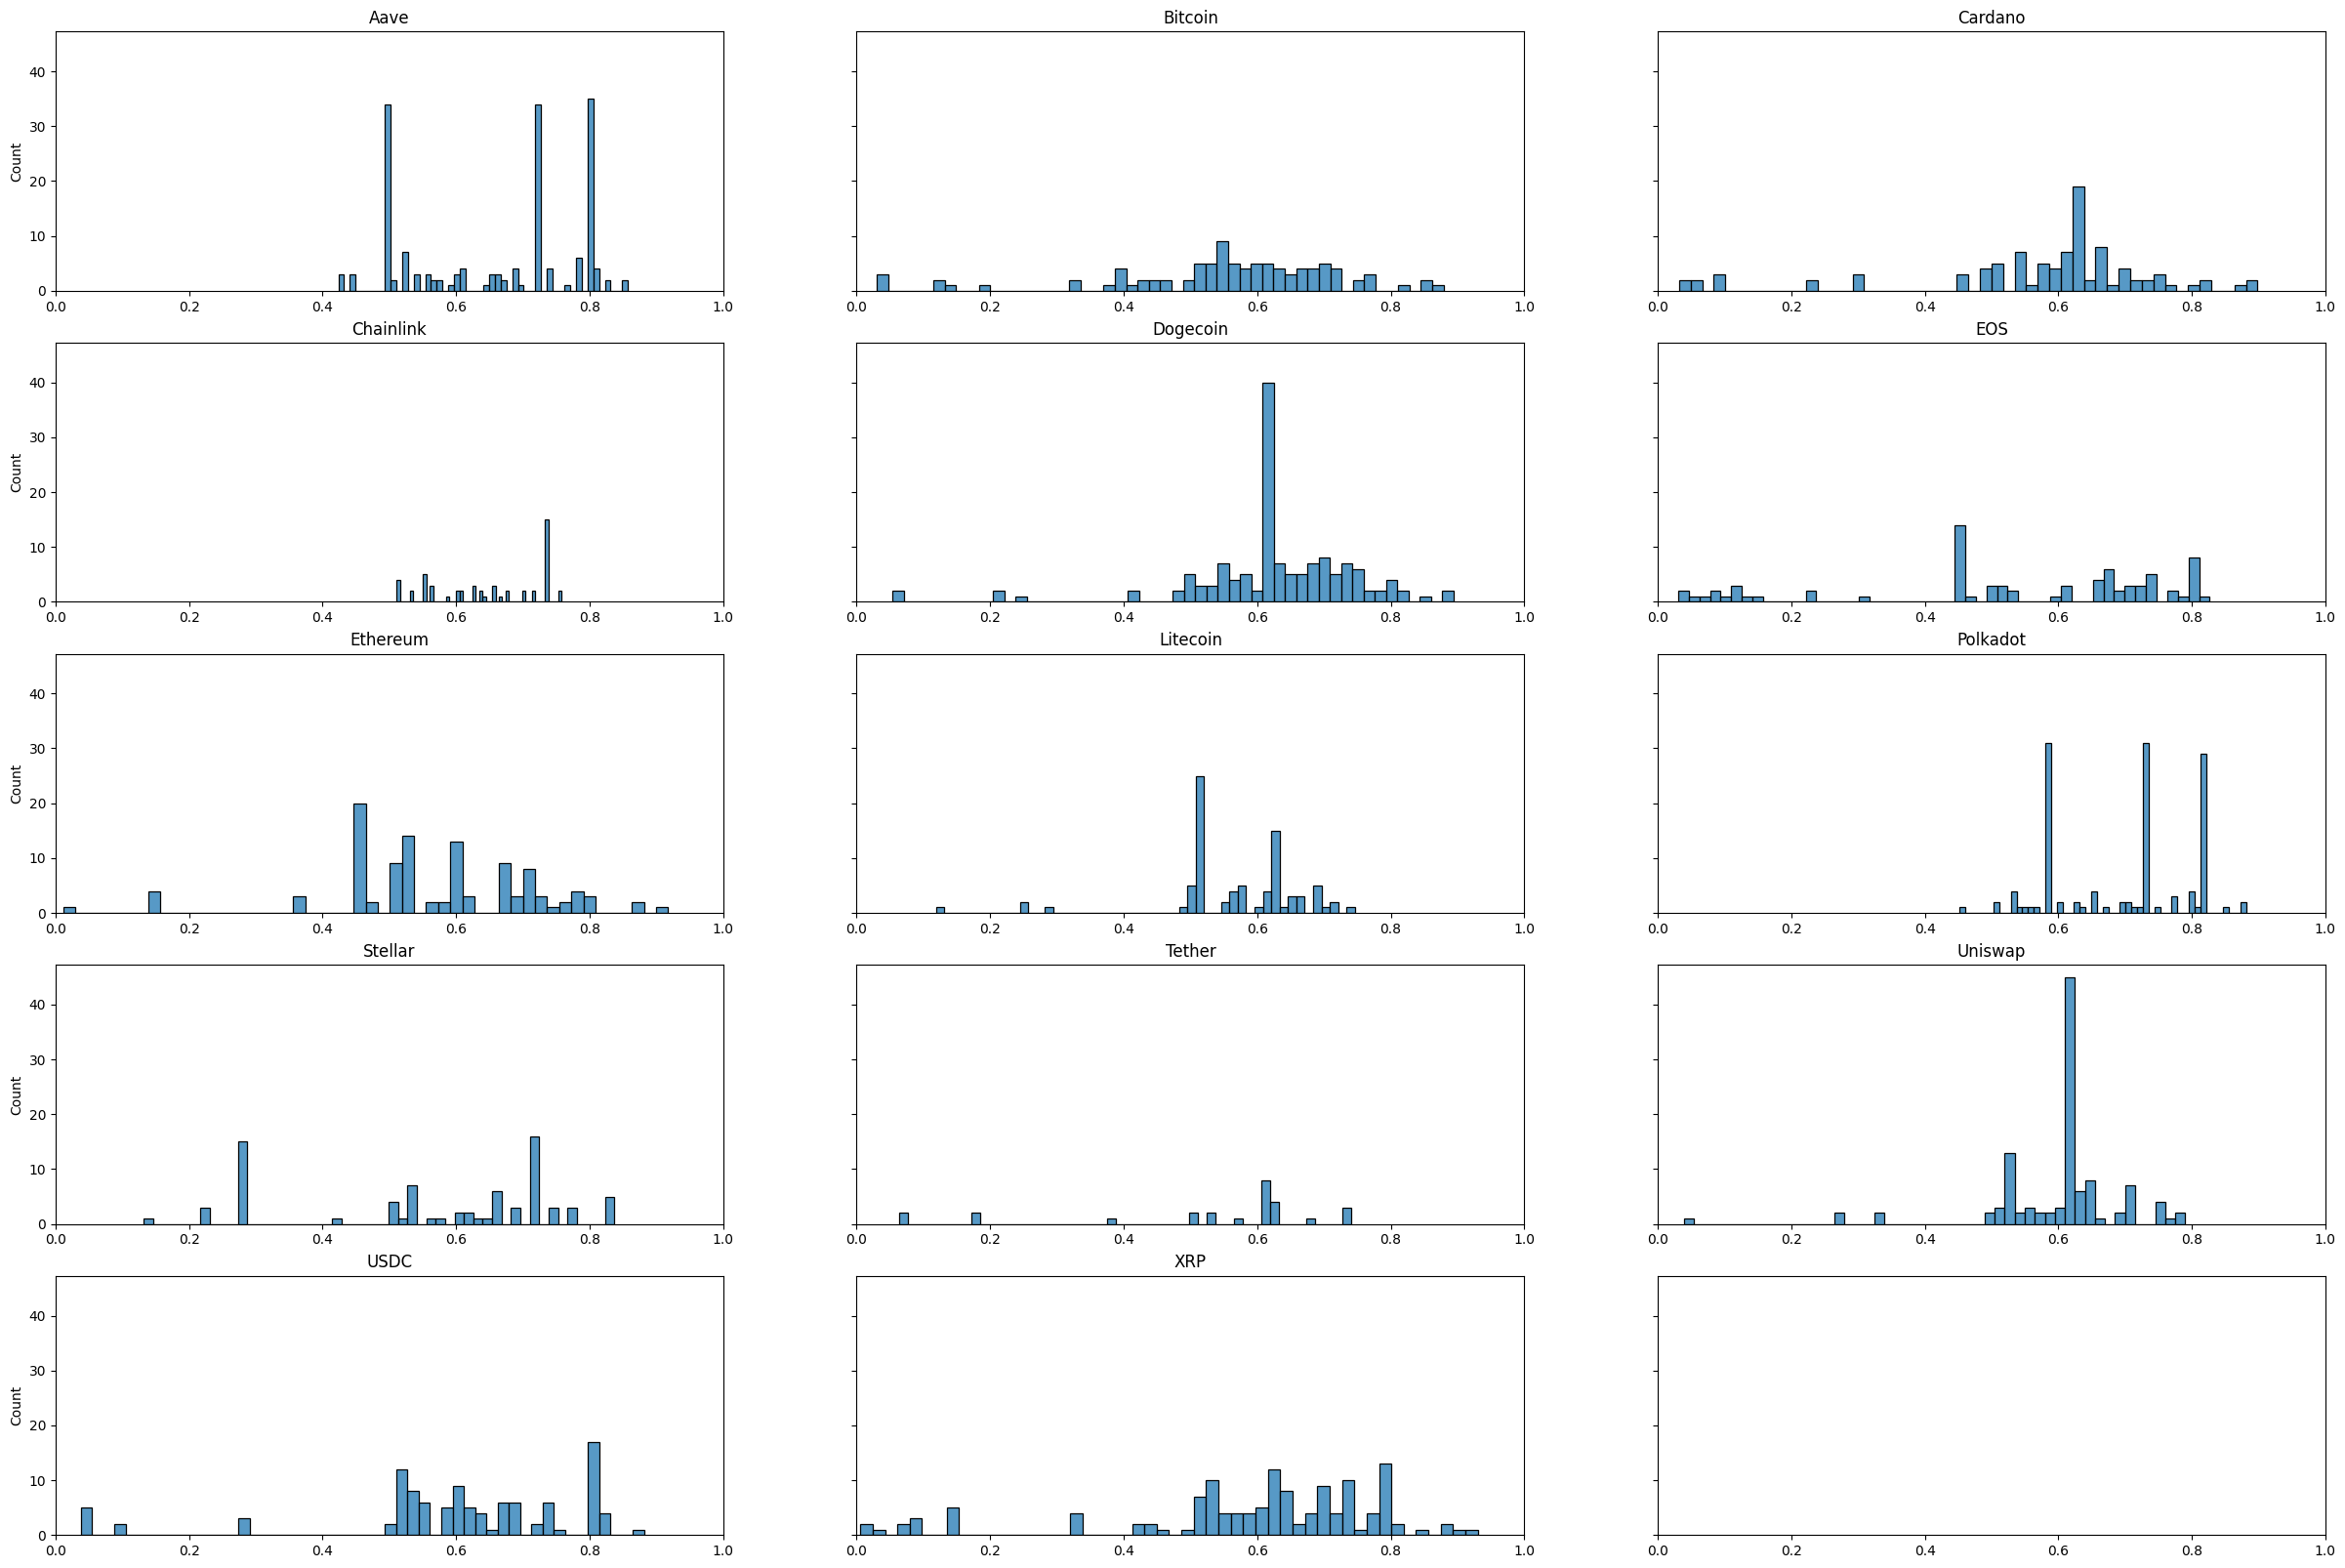

**We can observe that a few data points deviate significantly from the majority. To gain a better perspective, it is essential to address these outliers.**

#### After removal of outlier with threshold of 1.75 standard deviations
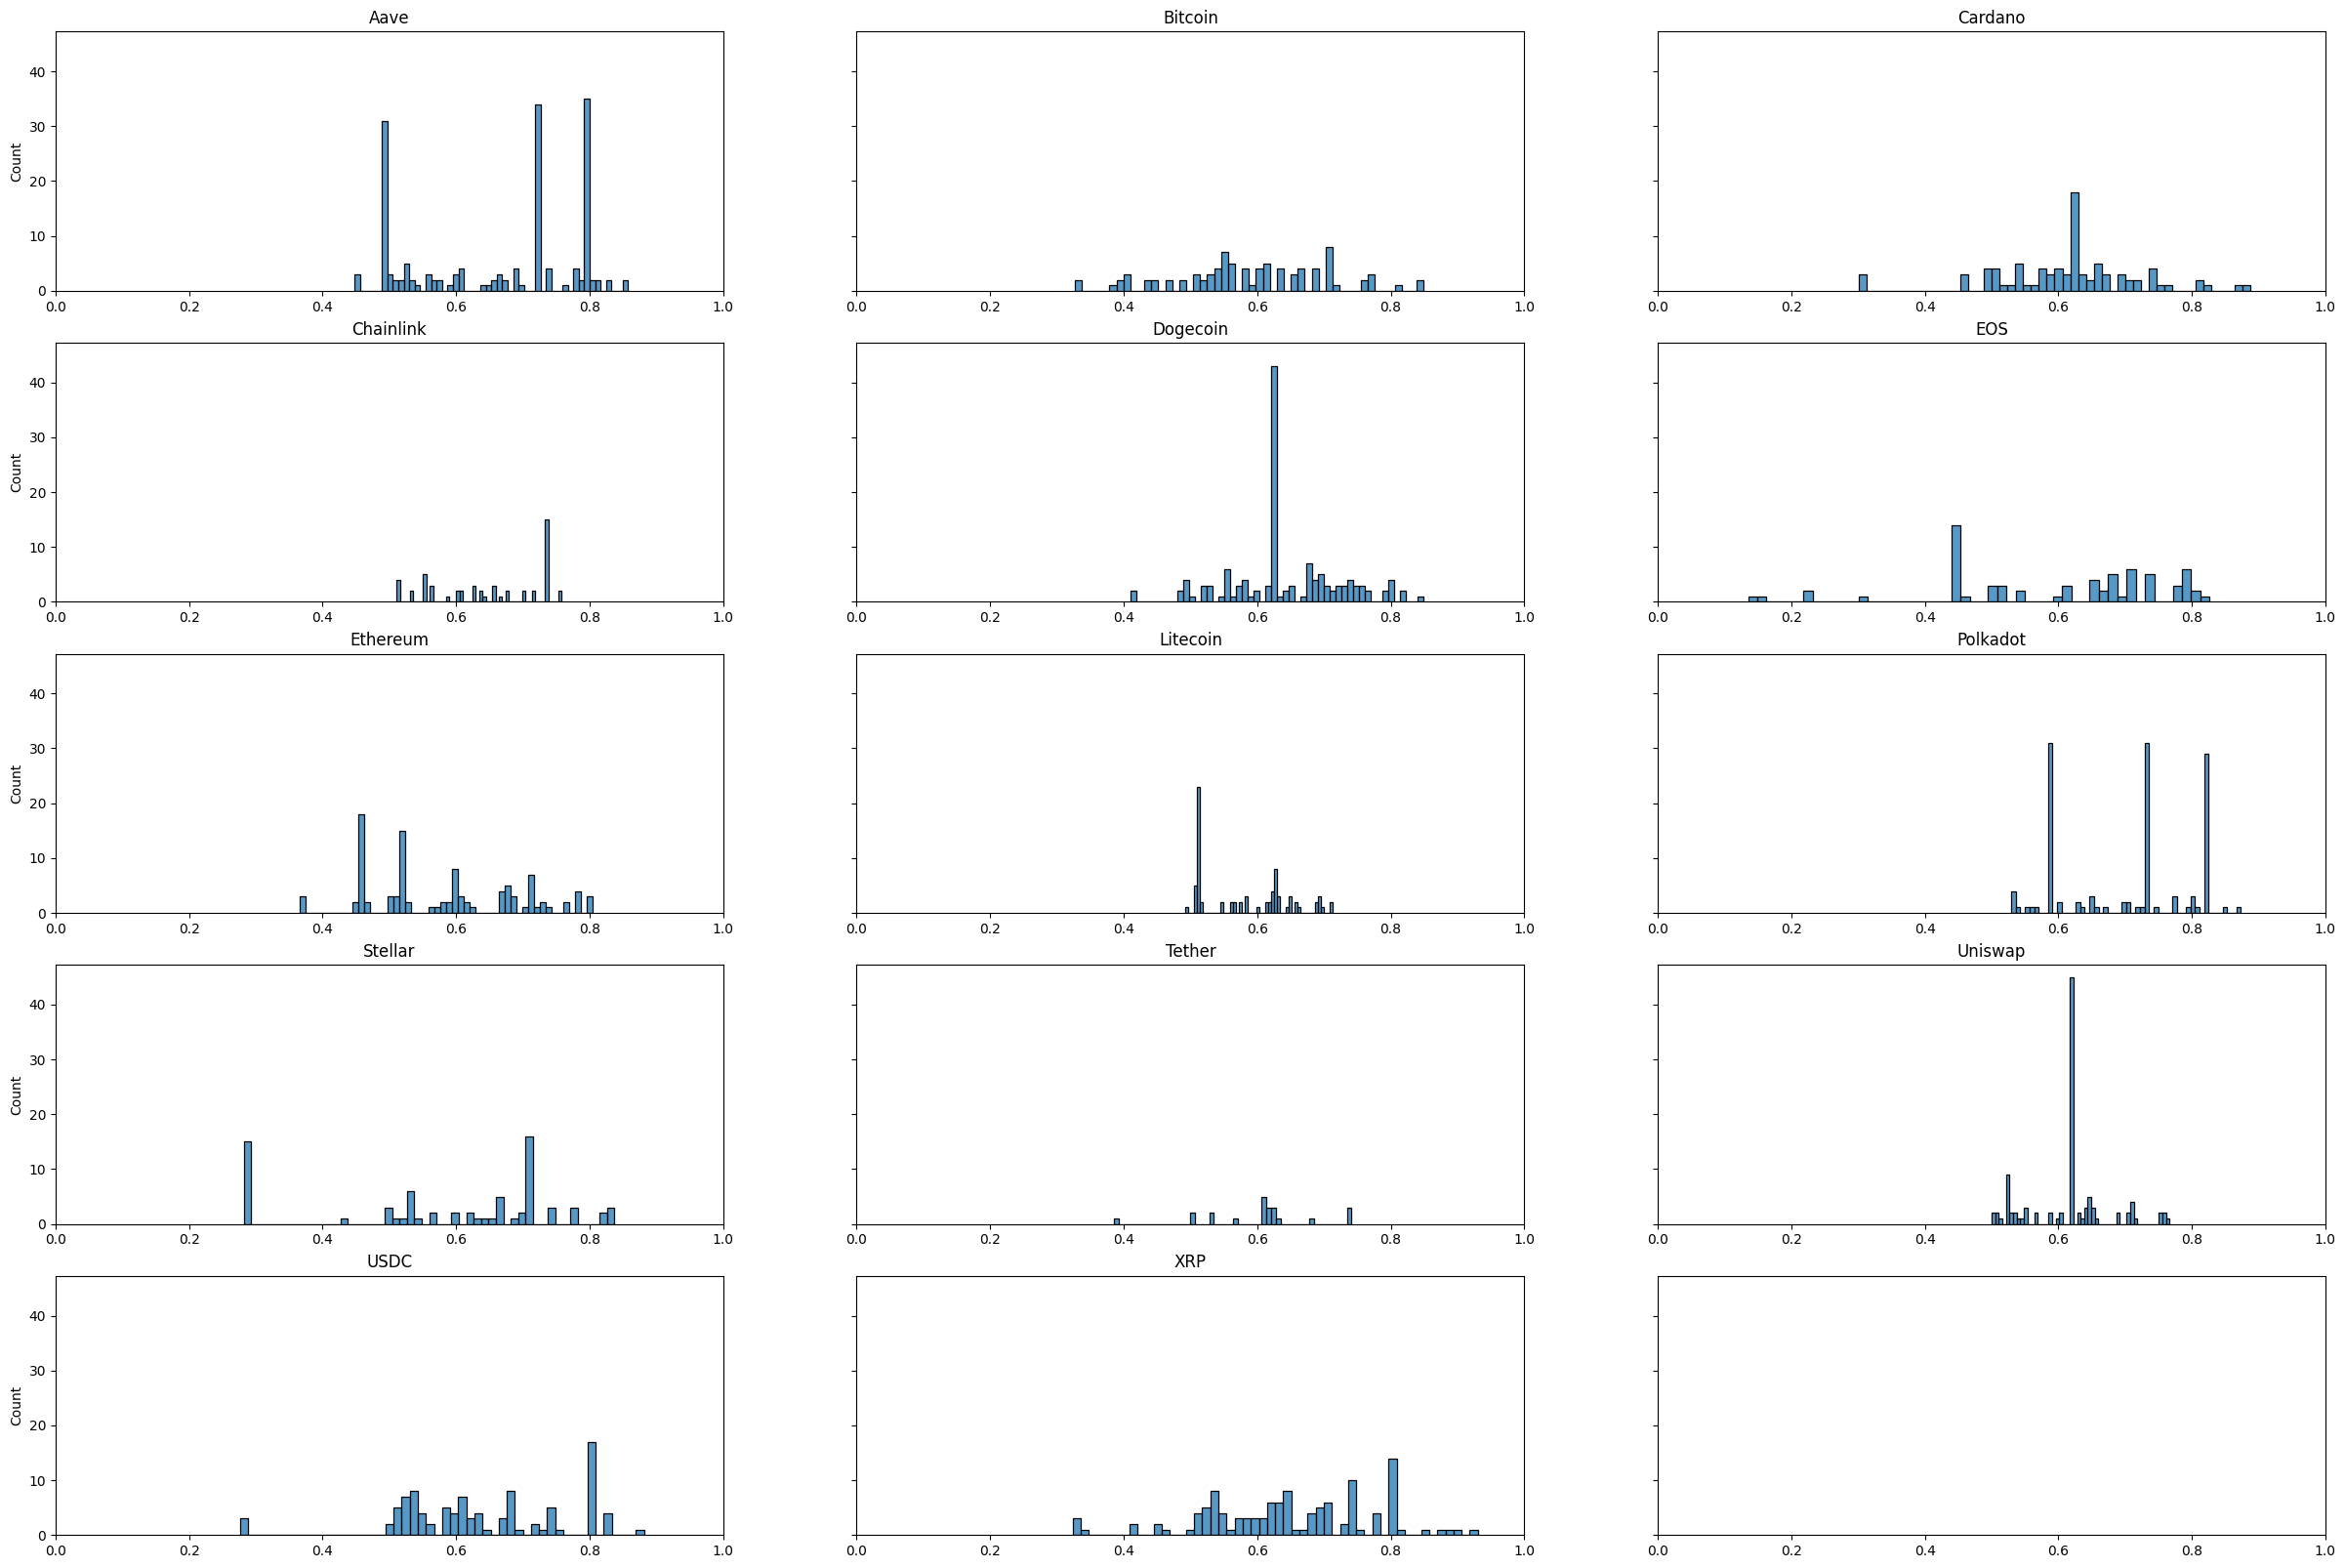

In [ ]:
!pip install snscrape -q

In [ ]:
import snscrape.modules.twitter as sntwitter

In [ ]:
query = "bitcoin -#hashtag since:2021-01-01 until:2021-05-31 lang:en"
query = "#bitcoin"
snscraperObj = sntwitter.TwitterSearchScraper(query)
snscraperObj

In [ ]:
for i,tweet in enumerate(snscraperObj.get_items()):
    print(tweet)
    break

ERROR:snscrape.base:Error retrieving https://twitter.com/i/api/graphql/7jT5GT59P8IFjgxwqnEdQw/SearchTimeline?variables=%7B%22rawQuery%22%3A%22%23bitcoin%22%2C%22count%22%3A20%2C%22product%22%3A%22Latest%22%2C%22withDownvotePerspective%22%3Afalse%2C%22withReactionsMetadata%22%3Afalse%2C%22withReactionsPerspective%22%3Afalse%7D&features=%7B%22rweb_lists_timeline_redesign_enabled%22%3Afalse%2C%22blue_business_profile_image_shape_enabled%22%3Afalse%2C%22responsive_web_graphql_exclude_directive_enabled%22%3Atrue%2C%22verified_phone_label_enabled%22%3Afalse%2C%22creator_subscriptions_tweet_preview_api_enabled%22%3Afalse%2C%22responsive_web_graphql_timeline_navigation_enabled%22%3Atrue%2C%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3Afalse%2C%22tweetypie_unmention_optimization_enabled%22%3Atrue%2C%22vibe_api_enabled%22%3Atrue%2C%22responsive_web_edit_tweet_api_enabled%22%3Atrue%2C%22graphql_is_translatable_rweb_tweet_is_translatable_enabled%22%3Atrue%2C%22view_count

ScraperException: ignored

In [ ]:
sntwitter.Se

In [ ]:
from collections import Counter

In [ ]:
query = 'Bitcoin'
url = f"https://coinmarketcap.com/community/search/latest/?q={query}"

In [ ]:
# Scrap all post's containers
%%time
soup = get_page(url, use_selenium=True, num_scrolls=50, cum_page=True)
all_posts_container = soup.find_all(class_="sc-cbc3d228-0 fASJKi")
print(f"{len(all_posts_container)} posts found!")

# check duplicates
counter = Counter(all_posts_container)
duplicates = [item for item, count in counter.items() if count > 1]
print("Number of Duplicates:", len(duplicates))

#remove duplicates
all_posts_container_rm_dub = list(dict.fromkeys(all_posts_container))
print(f"{len(all_posts_container_rm_dub)} posts left!")

343 posts found!
Number of Duplicates: 2
341 posts left!
CPU times: user 10.2 s, sys: 181 ms, total: 10.3 s
Wall time: 2min 7s


In [ ]:
tags = []

for i, tag in enumerate(all_posts_container):
    tags.append(tag["data-index"])

counter = Counter(tags)
len(tags), counter

In [ ]:
p1 = all_posts_container[4]
## post link
user_id = p1.find(class_="sc-16891c57-0 sc-746f84c8-0 kktnXr post-toolbar community")['id']
_pos = user_id.find("-")
user_id = user_id[_pos+1:]
post_link = f"https://coinmarketcap.com/community/post/{user_id}"
# profile pic
profilePicLink = p1.find(class_="avatar-item-img")['src']
## user name
nickname_ = p1.find(class_="nickname")
nickname = nickname_.text
## is_verified
verified = "" if nickname_.find(class_="sc-16891c57-0 ePsIok icon-certified") is None else "https://i.ibb.co/d05WCD0/icons8-verified-48.png"
## user handle
handle = p1.find(class_="handle").text
## posted time
time_posted = (p1.find(class_="tooltip").text).split(" ")
posted_time = time_posted[-1]
now = datetime.utcnow()
time_ = posted_time[:-1]
time_bucket = posted_time[-1]
if time_bucket == "s": posted_time_frmt = (now - relativedelta(seconds=int(time_))).strftime("%I:%M %p - %b %d, %Y")
elif time_bucket == "m": posted_time_frmt = (now - relativedelta(minutes=int(time_))).strftime("%I:%M %p - %b %d, %Y")
elif time_bucket == "h": posted_time_frmt = (now - relativedelta(hours=int(time_))).strftime("%I:%M %p - %b %d, %Y")
elif time_bucket == "d": posted_time_frmt = (now - relativedelta(days=int(time_))).strftime("%I:%M %p - %b %d, %Y")
else: posted_time_frmt = time_posted[-2] + " " + time_posted[-1] + ", " + str(now.year)
## post text
paras = p1.find(class_="text-wrapper").find_all("p")
postText = "\n".join([p.text for p in paras if (p.text != "")])
pattern = r'\t|\r|\f|\v|\xa0'
postText = re.sub(pattern, '', postText)
post_link, profilePicLink, nickname, verified, handle, time_posted, posted_time_frmt, postText

('https://coinmarketcap.com/community/post/331032140',
 'https://s3.coinmarketcap.com/static-gravity/image/cd8d4094a95343c09359a40ed0bbb18a.jpg',
 'Cryptonews.com',
 'https://i.ibb.co/d05WCD0/icons8-verified-48.png',
 '@Cryptonews_',
 ['·', 'Sep', '21'],
 'Sep 21, 2023',
 '🔥 Did you know that $IMX, $ALGO, and $AAVE are the best coins to buy today based off their fundamentals and bullish technical analysis?  Learn more 👇\n#CryptoNews #Altcoins')

In [ ]:
%%time
query = 'Bitcoin+-Aave+-Cardano+-Chainlink+-Dogecoin+-EOS+-Ethereum+-Litecoin+-Polkadot+-Stellar+-Tether+-Uniswap+-USDC+-XRP'
url = f"https://www.bing.com/news/search?q={query}&qft=interval%3d\"7\"&form=PTFTNR"
soup = get_page(url, use_selenium=True, num_scrolls=20)
print(f"{len(all_news_container)} news found!")

CPU times: user 707 ms, sys: 44.2 ms, total: 751 ms
Wall time: 47.1 s


In [ ]:
def find_element_with_partial_attribute(tag, attribute_name, partial_value):
    return tag.has_attr(attribute_name) and partial_value in tag[attribute_name]

all_news_container = soup.find_all(class_="news-card newsitem cardcommon")
containers_titles, containers_subtitles, authors, news_links, profilePicLinks, posted_times = [], [], [], [], [], []
for container in  all_news_container:
    header = container.find(class_='title')
    containers_titles.append(header.text)
    authors.append(header['data-author'])
    news_links.append(header['href'])
    containers_subtitles.append(container.find(class_='snippet').text)
    try:
        image = container.find(class_="caption_img")
        profilePicLinks.append(image.select_one('img.pubimg.rms_img, img.pubimg')['src'])
    except:
        profilePicLinks.append("")

    try:
        posted_time = container.find(class_="t_t").find(lambda tag: find_element_with_partial_attribute(tag, 'aria-label', 'ago')).text
        if posted_time is None:
            posted_time = datetime.utcnow().strftime("%b %d")
        posted_times.append(posted_time)
    except:
        posted_time = datetime.utcnow().strftime("%b %d")
        posted_times.append(posted_time)

len(containers_titles), len(containers_subtitles), len(authors), len(news_links), len(profilePicLinks), len(posted_times)

(70, 70, 70, 70, 70, 70)

In [ ]:
(containers_titles[-12]), (containers_subtitles[-12]), (authors[-12]), (news_links[-12]), (profilePicLinks[-12]), (posted_times[-12])

("Ken Smith's Diary: I do eclair; Monkeying around; Not sneezed at",
 'Snap AN AYRSHIRE golfer tells us a chap in his club, when the money being made with the online currency Bitcoin was being discussed, declared: "I hope Bitcoin is like Snapchat, in that people stop ...',
 'heraldscotland',
 'https://www.heraldscotland.com/opinion/15778168.ken-smiths-diary-eclair-monkeying-around-not-sneezed/',
 '',
 'Sep 24')

In [ ]:
for i in range(len(containers_titles)):
    content = containers_titles[i].text + ". " + (containers_subtitles[i].text)[:-4]
    print(content)
    print(sentiment_pipeline(content), sentiment_pipeline_crypto(content))
    print()

Bitcoin miners double down on efficiency and renewable energy at the World Digital Mining Summit. Bitcoin mining efficiency, a pivot to using renewable energy and the debut of the Antminer S21 was the primary focus of
[{'label': 'POSITIVE', 'score': 0.5753945708274841}] [{'label': 'Bullish', 'score': 0.5568526983261108}]

The Federal Reserve's influence on bitcoin price is back in play after its latest policy decision. This week, the central bank hit pause on rate hikes but indicated it could hold rates at higher levels for longer than
[{'label': 'NEGATIVE', 'score': 0.788856029510498}] [{'label': 'Neutral', 'score': 0.8009107112884521}]

Bitcoin fails to recoup post-Fed losses as $20K BTC price returns to radar. Data from Cointelegraph Markets Pro and TradingView covered a lackluster 24 hours for BTC price action, with $27,000 fading
[{'label': 'NEGATIVE', 'score': 0.9997771382331848}] [{'label': 'Neutral', 'score': 0.9730974435806274}]

Bitcoin Holding Above $26K Is ‘Remarkable’ as E